In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

import time

In [2]:
## dataframe with previously optimized parameters for another testing of the model(s)
opt = pd.DataFrame(data={'SigC': [0.3286], 'SigH': [0.2606], 'EpsC': [0.6730], 'EpsH': [0.1194], 'density': [707.0]})
x_opt = opt.drop('density', axis=1)
y_opt = opt['density']

## read data

In [3]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

## prepare data

In [4]:
## actually used random ints hard coded
random_ints = [678, 147, 561, 237, 588, 951, 490, 395, 877, 297, 721, 711, 985, 171, 75, 16, 669, 530, 999, 794, 936, 111, 816, 968, 48, 986, 829, 996, 272, 759, 390, 930, 633, 928, 854, 554, 562, 78, 222, 294, 725, 582, 731, 249, 791, 35, 180, 510, 593, 634]
#print(f'{np.sort(random_ints)}')
number_of_trees = [10, 100, 250, 500, 750, 1000]

In [5]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

    
for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.40, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.70, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=0.30, random_state=i)
    X_TRAINsSobol1.append(X_train)
    Y_TRAINsSobol1.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
    X_TESTsSobol1.append(X_test)
    Y_TESTsSobol1.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=0.85, random_state=i)
    X_TRAINsSobol2.append(X_train)
    Y_TRAINsSobol2.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
    X_TESTsSobol2.append(X_test)
    Y_TESTsSobol2.append(Y_test)

## create and train models

In [6]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []

for ntrees in number_of_trees:
    ntrees = int(ntrees)
    print(f'Training model with {ntrees} trees. ...')
    ## grid sampling 1296
    qMODELs1296 = []
    qY_PREDICTIONs1296 = []
    qRMSEs1296 = []
    qR2s1296 = []
    qSPEARMANRs1296 = []
    
    ## grid sampling 2401
    qMODELs2401 = []
    qY_PREDICTIONs2401 = []
    qRMSEs2401 = []
    qR2s2401 = []
    qSPEARMANRs2401 = []
    
    ## sobol sampling 1
    qMODELsSobol1 = []
    qY_PREDICTIONsSobol1 = []
    qRMSEsSobol1 = []
    qR2sSobol1 = []
    qSPEARMANRsSobol1 = []
    
    ## sobol sampling 2
    qMODELsSobol2 = []
    qY_PREDICTIONsSobol2 = []
    qRMSEsSobol2 = []
    qR2sSobol2 = []
    qSPEARMANRsSobol2 = []
    
    for i in range(0, len(random_ints)):
        print(f'\t{i+1}/{len(random_ints)}')
        ## create the model
        model1296 = RandomForestRegressor(n_estimators=ntrees, random_state=random_ints[i])
        #
        model2401 = RandomForestRegressor(n_estimators=ntrees, random_state=random_ints[i])
        #
        modelSobol1 = RandomForestRegressor(n_estimators=ntrees, random_state=random_ints[i])
        #
        modelSobol2 = RandomForestRegressor(n_estimators=ntrees, random_state=random_ints[i])
        
        ## train/fit the model
        model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
        qMODELs1296.append(model1296)
        #
        model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
        qMODELs2401.append(model2401)
        #
        modelSobol1.fit(X_TRAINsSobol1[i], Y_TRAINsSobol1[i])
        qMODELsSobol1.append(modelSobol1)
        #
        modelSobol2.fit(X_TRAINsSobol2[i], Y_TRAINsSobol2[i])
        qMODELsSobol2.append(modelSobol2)
        
        ## prediction using the test set
        Y_prediction1296 = model1296.predict(X_TESTs1296[i])
        qY_PREDICTIONs1296.append(Y_prediction1296)
        #
        Y_prediction2401 = model2401.predict(X_TESTs2401[i])
        qY_PREDICTIONs2401.append(Y_prediction2401)
        #
        Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[i])
        qY_PREDICTIONsSobol1.append(Y_predictionSobol1)
        #
        Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[i])
        qY_PREDICTIONsSobol2.append(Y_predictionSobol2)
        
        ## evaluate with Y_test
        rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
        r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
        spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
        qRMSEs1296.append(rmse1296)
        qR2s1296.append(r21296)
        qSPEARMANRs1296.append(spearman_r1296.statistic)
        #
        rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
        r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
        spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
        qRMSEs2401.append(rmse2401)
        qR2s2401.append(r22401)
        qSPEARMANRs2401.append(spearman_r2401.statistic)
        #
        rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[i], Y_predictionSobol1))
        r2Sobol1 = r2_score(Y_TESTsSobol1[i], Y_predictionSobol1)
        spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[i], Y_predictionSobol1)
        qRMSEsSobol1.append(rmseSobol1)
        qR2sSobol1.append(r2Sobol1)
        qSPEARMANRsSobol1.append(spearman_rSobol1.statistic)
        #
        rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[i], Y_predictionSobol2))
        r2Sobol2 = r2_score(Y_TESTsSobol2[i], Y_predictionSobol2)
        spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[i], Y_predictionSobol2)
        qRMSEsSobol2.append(rmseSobol2)
        qR2sSobol2.append(r2Sobol2)
        qSPEARMANRsSobol2.append(spearman_rSobol2.statistic)

    ## grid sampling 1296
#    MODELs1296.append(qMODELs1296)
    Y_PREDICTIONs1296.append(qY_PREDICTIONs1296)
    RMSEs1296.append(qRMSEs1296)
    R2s1296.append(qR2s1296)
    SPEARMANRs1296.append(qSPEARMANRs1296)
    
    ## grid sampling 2401
#    MODELs2401.append(qMODELs2401)
    Y_PREDICTIONs2401.append(qY_PREDICTIONs2401)
    RMSEs2401.append(qRMSEs2401)
    R2s2401.append(qR2s2401)
    SPEARMANRs2401.append(qSPEARMANRs2401)
    
    ## sobol sampling 1
#    MODELsSobol1.append(qMODELsSobol1)
    Y_PREDICTIONsSobol1.append(qY_PREDICTIONsSobol1)
    RMSEsSobol1.append(qRMSEsSobol1)
    R2sSobol1.append(qR2sSobol1)
    SPEARMANRsSobol1.append(qSPEARMANRsSobol1)
    
    ## sobol sampling 2
#    MODELsSobol2.append(qMODELsSobol2)
    Y_PREDICTIONsSobol2.append(qY_PREDICTIONsSobol2)
    RMSEsSobol2.append(qRMSEsSobol2)
    R2sSobol2.append(qR2sSobol2)
    SPEARMANRsSobol2.append(qSPEARMANRsSobol2)

print(f'done.\n')

Training model with 10 trees. ...
	1/50
	2/50
	3/50
	4/50
	5/50
	6/50
	7/50
	8/50
	9/50
	10/50
	11/50
	12/50
	13/50
	14/50
	15/50
	16/50
	17/50
	18/50
	19/50
	20/50
	21/50
	22/50
	23/50
	24/50
	25/50
	26/50
	27/50
	28/50
	29/50
	30/50
	31/50
	32/50
	33/50
	34/50
	35/50
	36/50
	37/50
	38/50
	39/50
	40/50
	41/50
	42/50
	43/50
	44/50
	45/50
	46/50
	47/50
	48/50
	49/50
	50/50
Training model with 100 trees. ...
	1/50
	2/50
	3/50
	4/50
	5/50
	6/50
	7/50
	8/50
	9/50
	10/50
	11/50
	12/50
	13/50
	14/50
	15/50
	16/50
	17/50
	18/50
	19/50
	20/50
	21/50
	22/50
	23/50
	24/50
	25/50
	26/50
	27/50
	28/50
	29/50
	30/50
	31/50
	32/50
	33/50
	34/50
	35/50
	36/50
	37/50
	38/50
	39/50
	40/50
	41/50
	42/50
	43/50
	44/50
	45/50
	46/50
	47/50
	48/50
	49/50
	50/50
Training model with 250 trees. ...
	1/50
	2/50
	3/50
	4/50
	5/50
	6/50
	7/50
	8/50
	9/50
	10/50
	11/50
	12/50
	13/50
	14/50
	15/50
	16/50
	17/50
	18/50
	19/50
	20/50
	21/50
	22/50
	23/50
	24/50
	25/50
	26/50
	27/50
	28/50
	29/50
	30/50
	31/50
	32/50

## calculate RMSE/R2/SpearmanRank

In [7]:
## grid sampling 1296
RMSEs1296_means = []
R2s1296_means = []
SPEARMANRs1296_means = []

## grid sampling 2401
RMSEs2401_means = []
R2s2401_means = []
SPEARMANRs2401_means = []

## sobol sampling 1
RMSEsSobol1_means = []
R2sSobol1_means = []
SPEARMANRsSobol1_means = []

## sobol sampling 2
RMSEsSobol2_means = []
R2sSobol2_means = []
SPEARMANRsSobol2_means = []
for k in range(0, len(number_of_trees)):
    ## grid sampling 1296
    rmse1296_mean = np.mean(RMSEs1296[k])
    RMSEs1296_means.append(rmse1296_mean)
    #
    r21296_mean = np.mean(R2s1296[k])
    R2s1296_means.append(r21296_mean)
    #
    spearmanr1296_mean = np.mean(SPEARMANRs1296[k])
    SPEARMANRs1296_means.append(spearmanr1296_mean)

    ## grid sampling 2401
    rmse2401_mean = np.mean(RMSEs2401[k])
    RMSEs2401_means.append(rmse2401_mean)
    #
    r22401_mean = np.mean(R2s2401[k])
    R2s2401_means.append(r22401_mean)
    #
    spearmanr2401_mean = np.mean(SPEARMANRs2401[k])
    SPEARMANRs2401_means.append(spearmanr2401_mean)

    ## Sobol 1
    rmseSobol1_mean = np.mean(RMSEsSobol1[k])
    RMSEsSobol1_means.append(rmseSobol1_mean)
    #
    r2Sobol1_mean = np.mean(R2sSobol1[k])
    R2sSobol1_means.append(r2Sobol1_mean)
    #
    spearmanrSobol1_mean = np.mean(SPEARMANRsSobol1[k])
    SPEARMANRsSobol1_means.append(spearmanrSobol1_mean)

    ## Sobol 2
    rmseSobol2_mean = np.mean(RMSEsSobol2[k])
    RMSEsSobol2_means.append(rmseSobol2_mean)
    #
    r2Sobol2_mean = np.mean(R2sSobol2[k])
    R2sSobol2_means.append(r2Sobol2_mean)
    #
    spearmanrSobol2_mean = np.mean(SPEARMANRsSobol2[k])
    SPEARMANRsSobol2_means.append(spearmanrSobol2_mean)

## plots

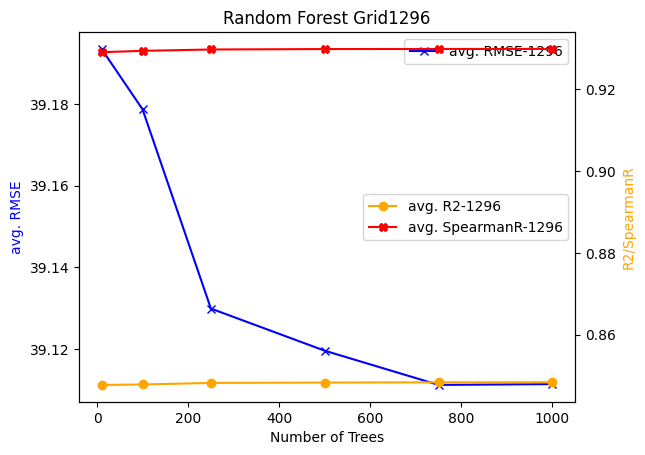

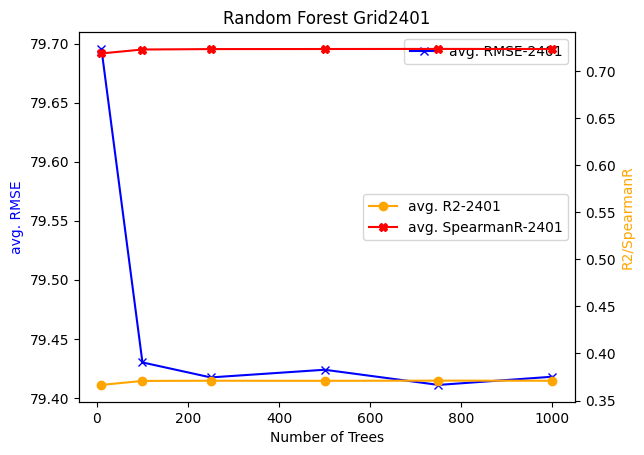

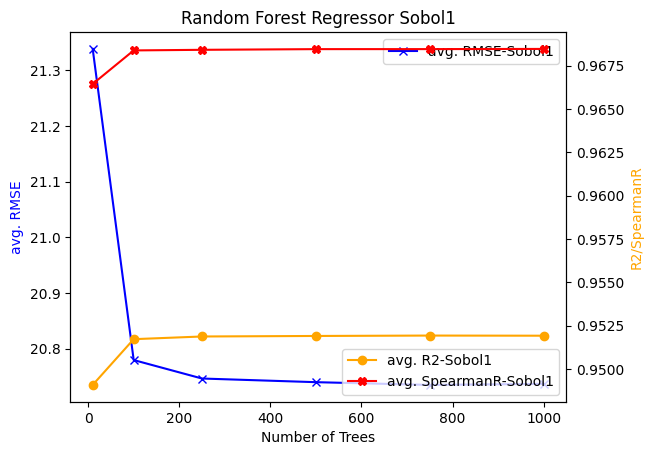

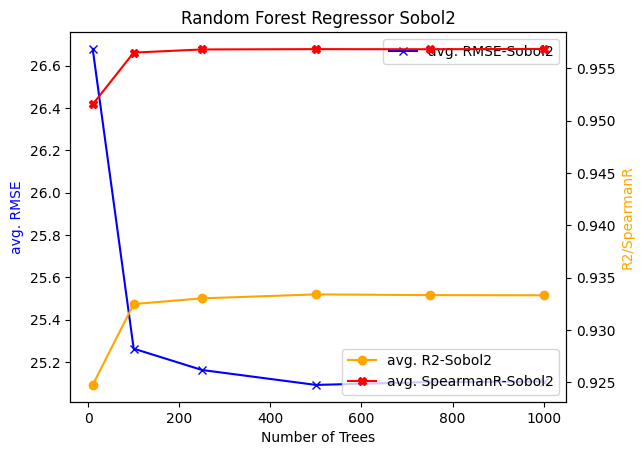

In [8]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(number_of_trees, RMSEs1296_means, '-x', color='blue', label='avg. RMSE-1296')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid1296')

ax2 = ax1.twinx()
ax2.plot(number_of_trees, R2s1296_means, '-o', color='orange', label='avg. R2-1296')
ax2.plot(number_of_trees, SPEARMANRs1296_means, '-X', color='red', label='avg. SpearmanR-1296')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID1296_test-number-of-trees.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(number_of_trees, RMSEs2401_means, '-x', color='blue', label='avg. RMSE-2401')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid2401')

ax2 = ax1.twinx()
ax2.plot(number_of_trees, R2s2401_means, '-o', color='orange', label='avg. R2-2401')
ax2.plot(number_of_trees, SPEARMANRs2401_means, '-X', color='red', label='avg. SpearmanR-2401')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID2401_test-number-of-trees.png')


## Sobol 1
fig, ax1 = plt.subplots()
ax1.plot(number_of_trees, RMSEsSobol1_means, '-x', color='blue', label='avg. RMSE-Sobol1')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol1')

ax2 = ax1.twinx()
ax2.plot(number_of_trees, R2sSobol1_means, '-o', color='orange', label='avg. R2-Sobol1')
ax2.plot(number_of_trees, SPEARMANRsSobol1_means, '-X', color='red', label='avg. SpearmanR-Sobol1')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-1_test-number-of-trees.png')


## Sobol 2
fig, ax1 = plt.subplots()
ax1.plot(number_of_trees, RMSEsSobol2_means, '-x', color='blue', label='avg. RMSE-Sobol2')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol2')

ax2 = ax1.twinx()
ax2.plot(number_of_trees, R2sSobol2_means, '-o', color='orange', label='avg. R2-Sobol2')
ax2.plot(number_of_trees, SPEARMANRsSobol2_means, '-X', color='red', label='avg. SpearmanR-Sobol2')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-2_test-number-of-trees.png')

## lowest RMSE/R2/SpearmanR

In [11]:
min_RMSEs1296 = min(RMSEs1296_means)
print(f'min RMSEs1296 = \t\t\t\t{min_RMSEs1296}')
iRMSEs1296 = RMSEs1296_means.index(min_RMSEs1296)
print(f'Number of Trees = \t\t\t\t{number_of_trees[iRMSEs1296]}')
print(f'corresp. R2: R2s1296_means[{iRMSEs1296}] = \t\t{R2s1296_means[iRMSEs1296]}')
print(f'corresp. SpearmanR: SPEARMANRs1296_means[{iRMSEs1296}] = \t{SPEARMANRs1296_means[iRMSEs1296]}\n\n')

min_RMSEs2401 = min(RMSEs2401_means)
print(f'min RMSEs2401 = \t\t\t\t{min_RMSEs2401}')
iRMSEs2401 = RMSEs2401_means.index(min_RMSEs2401)
print(f'Number of Trees = \t\t\t\t{number_of_trees[iRMSEs2401]}')
print(f'corresp. R2: R2s2401_means[{iRMSEs2401}] = \t\t{R2s2401_means[iRMSEs2401]}')
print(f'corresp. SpearmanR: SPEARMANRs2401_means[{iRMSEs2401}] = \t{SPEARMANRs2401_means[iRMSEs2401]}\n\n')

min_RMSEsSobol1 = min(RMSEsSobol1_means)
print(f'min RMSEsSobol1 = \t\t\t\t{min_RMSEsSobol1}')
iRMSEsSobol1 = RMSEsSobol1_means.index(min_RMSEsSobol1)
print(f'Number of Trees = \t\t\t\t{number_of_trees[iRMSEsSobol1]}')
print(f'corresp. R2: R2sSobol1_means[{iRMSEsSobol1}] = \t\t{R2sSobol1_means[iRMSEsSobol1]}')
print(f'corresp. SpearmanR: SPEARMANRsSobol1_means[{iRMSEsSobol1}] = {SPEARMANRsSobol1_means[iRMSEsSobol1]}\n\n')

min_RMSEsSobol2 = min(RMSEsSobol2_means)
print(f'min RMSEsSobol2 = \t\t\t\t{min_RMSEsSobol2}')
iRMSEsSobol2 = RMSEsSobol2_means.index(min_RMSEsSobol2)
print(f'Number of Trees = \t\t\t\t{number_of_trees[iRMSEsSobol2]}')
print(f'corresp. R2: R2sSobol2_means[{iRMSEsSobol2}] = \t\t{R2sSobol2_means[iRMSEsSobol2]}')
print(f'corresp. SpearmanR: SPEARMANRsSobol2_means[{iRMSEsSobol2}] = {SPEARMANRsSobol2_means[iRMSEsSobol2]}\n\n')

min RMSEs1296 = 				39.11113959093727
Number of Trees = 				750
corresp. R2: R2s1296_means[4] = 		0.8483727345602554
corresp. SpearmanR: SPEARMANRs1296_means[4] = 	0.929861901678062


min RMSEs2401 = 				79.41093960038103
Number of Trees = 				750
corresp. R2: R2s2401_means[4] = 		0.3711385507494911
corresp. SpearmanR: SPEARMANRs2401_means[4] = 	0.7232253340603468


min RMSEsSobol1 = 				20.734888561473344
Number of Trees = 				750
corresp. R2: R2sSobol1_means[4] = 		0.9519264690408303
corresp. SpearmanR: SPEARMANRsSobol1_means[4] = 0.9684513420675072


min RMSEsSobol2 = 				25.09177134808515
Number of Trees = 				500
corresp. R2: R2sSobol2_means[3] = 		0.9333886318862994
corresp. SpearmanR: SPEARMANRsSobol2_means[3] = 0.9568369187596337


